#Detect oil spill using given dataset not from image  classification from csv dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv('/content/OilSpill_Dataset.csv')

In [ ]:
df.head()

,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780,0.19,...,2850,1000,763.16,135.46,3.73,0.6,33243.19,65.74,7.95,1.1
0,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
1,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
2,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
3,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
4,6,54,1438.13,544.91,82,135000.0,44.67,6.92,1570.0,0.15,...,608.28,200.00,150.00,52.22,4.06,0,30967.25,65.77,7.85,1


In [ ]:
#give column name f1, f2...
# Assign new column names based on the number of columns
num_columns = 50
column_names = [f'f_{i}' for i in range(1, num_columns + 1)]
df = pd.read_csv('/content/OilSpill_Dataset.csv', header=None, names=column_names)

In [ ]:
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [ ]:
#change the column name f_50 to target column as Target
df=df.rename(columns={'f_50':'Target'})

In [ ]:
#drop f_1 column index already in table
df=df.drop('f_1',axis=1)

In [ ]:
#find the column has a mean(average) value 0 then dtrop that column
df.columns[df.mean()==0]

Index(['f_23'], dtype='object')

In [ ]:
#drop the column has filled by 0
df=df.drop('f_23',axis=1)

In [ ]:
df.shape

(937, 48)

In [ ]:
#check duplicated value in row wise
df.duplicated().sum()

0

In [ ]:
#check the duplicate in column wise
df.T.duplicated().sum()

0

In [ ]:
#check the null values
df.isna().sum().any()

False

In [ ]:
#value count in target column
df['Target'].value_counts()

,count
Target,
0,896
1,41


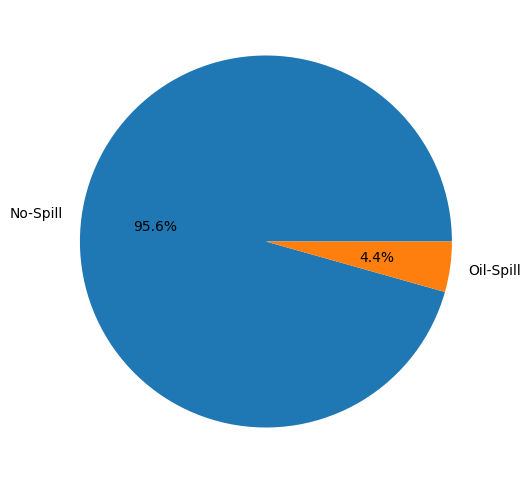

In [ ]:
#pie chart on target column
plt.figure(figsize=(6,8))
df_tar=df['Target'].value_counts()
plt.pie(df_tar,labels=['No-Spill','Oil-Spill'],autopct='%1.1f%%')
plt.show()

#Correlation

In [ ]:
cor = df.corr()
cor.style.background_gradient(cmap='coolwarm')

,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,Target
f_2,1.000000,0.058390,0.052638,-0.036870,0.953947,-0.136761,-0.016822,0.829978,0.128465,0.745590,0.004035,0.020195,0.176080,-0.118317,0.235500,0.237388,0.321276,0.022253,-0.053111,-0.057095,0.140805,-0.142899,0.131439,-0.088328,-0.013225,0.091962,0.170798,-0.163065,0.005472,0.118776,-0.009433,0.118634,0.869227,0.873996,-0.148739,0.443913,0.080779,0.071089,0.555154,0.777807,0.800939,0.716496,-0.080879,-0.048315,0.118792,-0.128222,0.139417,0.034128
f_3,0.058390,1.000000,0.549510,-0.082764,0.050795,-0.627934,-0.349541,0.158686,0.073794,-0.064076,-0.081738,0.042723,0.299324,-0.301641,0.439603,-0.003753,-0.046857,0.599107,-0.193047,-0.033185,0.299426,-0.669548,0.059858,-0.013191,0.627137,-0.119572,0.012991,-0.368946,-0.097925,0.585351,-0.061054,0.585760,0.178255,0.177423,0.246582,0.332342,-0.279094,-0.165125,0.186920,0.178287,0.129653,0.176883,-0.088310,-0.182458,-0.022098,0.048291,0.162600,-0.035221
f_4,0.052638,0.549510,1.000000,0.048847,0.024693,-0.546205,-0.222063,0.097683,0.202167,-0.082742,0.106767,0.224342,0.335270,-0.039329,0.372116,-0.000815,-0.020119,0.494286,-0.011078,0.132370,0.615556,-0.667478,0.466752,-0.503382,0.115749,0.113152,0.167272,-0.551173,-0.358789,0.686419,-0.064612,0.686369,0.151832,0.147977,0.284814,0.262117,0.282325,0.344152,-0.046934,0.032402,0.022234,0.000664,-0.220461,-0.204776,0.106758,-0.394081,0.476127,-0.050489
f_5,-0.036870,-0.082764,0.048847,1.000000,-0.028431,0.059128,0.123814,-0.047879,0.098573,-0.075843,0.009470,0.013574,-0.016254,0.028305,-0.029425,0.045836,0.065762,-0.065304,0.048283,0.032183,0.122604,0.001713,0.130162,-0.109169,-0.110526,0.138419,0.045215,-0.094680,-0.175452,0.062919,0.044074,0.059118,-0.044723,-0.039225,0.100720,-0.006470,0.204627,0.232303,-0.066930,-0.014877,-0.013742,-0.012346,-0.076695,-0.080136,0.070070,-0.135294,0.116896,-0.078598
f_6,0.953947,0.050795,0.024693,-0.028431,1.000000,-0.093589,-0.001395,0.894150,0.097449,0.765628,-0.029363,-0.017706,0.155767,-0.147712,0.226015,0.302462,0.406917,0.046484,-0.075633,-0.080839,0.076952,-0.097027,0.060381,-0.042262,0.010893,0.047533,0.118327,-0.100486,0.058062,0.060508,-0.009910,0.060826,0.884713,0.892963,-0.179259,0.480804,0.021929,0.021595,0.594273,0.844597,0.868353,0.770044,-0.077783,-0.046834,0.126850,-0.058752,0.069731,0.049318
f_7,-0.136761,-0.627934,-0.546205,0.059128,-0.093589,1.000000,0.381206,-0.188076,-0.380340,0.093376,-0.363593,-0.481003,-0.574566,-0.115334,-0.563544,-0.008360,0.027642,-0.134812,-0.222835,-0.386666,-0.606984,0.906524,-0.565818,0.138941,-0.393415,-0.145690,-0.283833,0.725108,0.228706,-0.818055,0.101277,-0.819826,-0.246512,-0.239744,-0.386837,-0.383085,-0.130835,-0.051147,-0.115014,-0.100003,-0.074308,-0.073751,0.077207,0.088633,-0.157243,0.483034,-0.612819,-0.026183
f_8,-0.016822,-0.349541,-0.222063,0.123814,-0.001395,0.381206,1.000000,0.001073,0.670628,0.167904,0.406409,0.289904,0.178362,0.335692,0.051995,-0.245330,-0.188000,-0.254853,0.505829,0.361435,-0.086842,0.360343,0.041689,-0.167225,-0.455887,0.349434,0.175192,0.082133,-0.013229,-0.235055,0.082125,-0.239614,-0.021463,-0.019355,-0.250518,-0.086931,0.297139,0.281511,0.013476,-0.015712,-0.013193,0.002439,-0.061639,-0.051879,-0.028117,-0.101155,0.033731,-0.014434
f_9,0.829978,0.158686,0.097683,-0.047879,0.894150,-0.188076,0.001073,1.000000,0.164098,0.671358,-0.008391,0.018342,0.261617,-0.215468,0.365164,0.160027,0.207135,0.087192,-0.080864,-0.069741,0.120763,-0.186528,0.095497,-0.039744,0.084778,0.059639,0.145497,-0.167507,0.070491,0.172914,-0.020690,0.173239,0.979517,0.980876,-0.209671,0.778100,0.003008,0.001339,0.675610,0.784833,0.770129,0.736075,-0.073312,-0.048994,0.102540,-0.080203,0.113389,0.076679
f_10,0.128465,0.073794,0.202167,0.098573,0.097449,-0.380340,0.670628,0.164098,1.000000,0.102331,0.747509,0.7308

In [ ]:
X=df.drop('Target', axis=1)
y =df['Target']

#apply pearson correlation
***Yellowbrick***   is a Python library designed to facilitate the creation of visual diagnostic tools for machine learning. It provides various visualizations to help data scientists understand the performance and behavior of machine learning models.

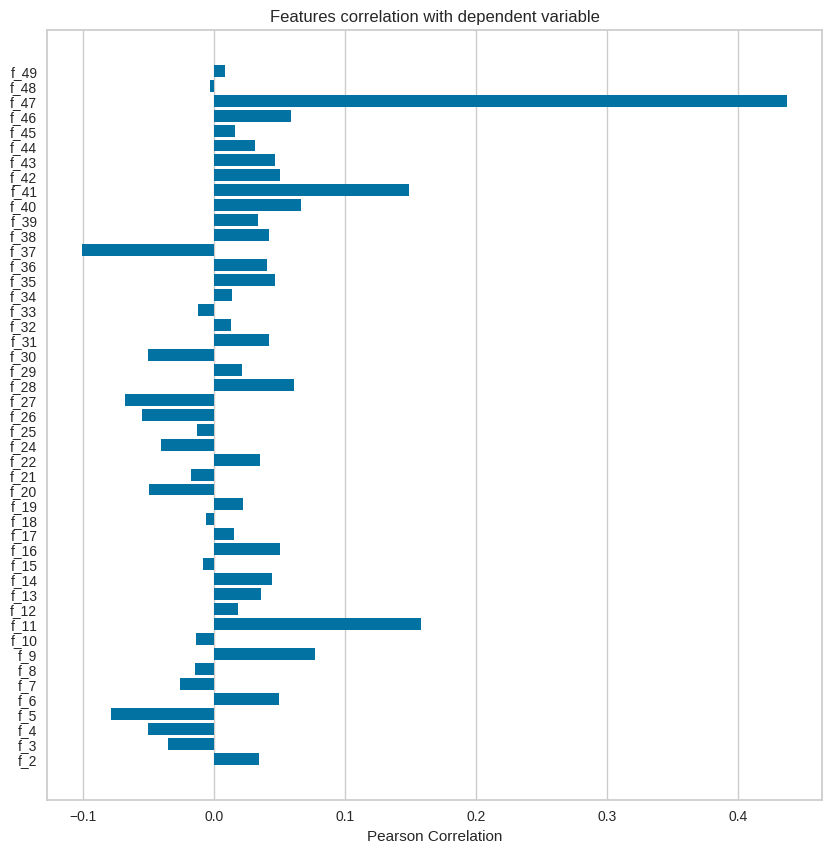

In [ ]:
from yellowbrick.target.feature_correlation import feature_correlation
plt.figure(figsize=(10,10))
feature_correlation(X, y)
plt.show();

#features selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
model=SelectKBest(score_func=f_classif,k=30)
df_av=model.fit(X,y)

In [ ]:
cdf=df_av.get_support()
cdf

array([ True,  True,  True,  True,  True, False, False,  True, False,
        True, False,  True,  True, False,  True, False, False, False,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False])

In [ ]:
columns=X.columns[cdf]
columns

Index(['f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_9', 'f_11', 'f_13', 'f_14',
       'f_16', 'f_20', 'f_22', 'f_24', 'f_26', 'f_27', 'f_28', 'f_30', 'f_31',
       'f_35', 'f_36', 'f_37', 'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43',
       'f_44', 'f_46', 'f_47'],
      dtype='object')

In [ ]:
#transfom the data in variance theshold which is array format
df_av=df_av.transform(X)

In [ ]:
X=pd.DataFrame(df_av,columns=columns)

In [ ]:
X.shape

(937, 30)

#spliting dataset in train and test dataset

In [ ]:
#split ther dataset in the train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#apply all classification model in this dataset then  train the model

In [ ]:
# Define the classification models you want to test
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

In [ ]:
# Initialize a dictionary to store accuracy scores for each model
accuracy_scores = {}

In [ ]:
# Loop through each model
for model_name,model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy score
    accuracy_scores[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Find the best model based on accuracy
best_model = max(accuracy_scores, key=accuracy_scores.get)
print(f"\nBest Model: {best_model} with Accuracy: {accuracy_scores[best_model]:.4f}")

Logistic Regression Accuracy: 0.9521
Random Forest Accuracy: 0.9840
SVM Accuracy: 0.9681
K-Nearest Neighbors Accuracy: 0.9681
Decision Tree Accuracy: 0.9734

Best Model: Random Forest with Accuracy: 0.9840


In [ ]:
#save the model
import pickle
pickle.dump(best_model,open('best_model.pkl','wb'))